# ICU survivor prediction
# Machine Learning, Exercise 2
王敏行 id:2018012386 wangmx18@mails.tsinghua.edu.cn


### Exp.4 k-Nearest Neighbor classifier
kNN algorithm(s)
Here we introduce the kNN classifier from [sci-kit learn package](https://scikit-learn.org/stable/index.html). Like most kNN classifiers, for each test point, it follows following steps:
   1. Calculate the distances from the instance to all training points. The distance definition can be Manhattan, Euclidean, etc..
   2. Sort all of the training points according to their distances to the testing point in ascending order. Pick the nearest **k**(, which is defined as a parameter of the kNN algorithm at the beginning,) training points as "nearest neighbors".
   3. Classify this testing point into the category which appears the most frequently in its k nearest neighbors.
Following codes are generated by myself, referring to [sklearn official document](https://sklearn.apachecn.org/docs/master/7.html) and [终日而思一的文章 - 知乎](
https://zhuanlan.zhihu.com/p/61996479).

As for the parameters in the function **sklearn.neighbors.KNeighborClassifier**, some important ones are *n_neighbor*,*weights*, *metric* and *algorithm*.
- n_neighbor: "k" in kNN, the number of the nearest neighbor considered.
- weights: 
    - uniform: weights over different distance are the same. All points are considered equally.
    - distance: Larger the distance, less influential the distance is to the classification result.
- metric: the definition of distance, like "Euclidean", "Manhattan", "Chebyshev" and "Minkowski"(by default).
- algorithm: Methods used to compute the nearest neighbors, like Ball tree, KD tree and brute method.
---
> See detailed parameter implementations the source code `_classification.py`. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)

ts = pd.read_csv('data1forEx1to4/test1_icu_data.csv')
tr = pd.read_csv('data1forEx1to4/train1_icu_data.csv')
Y_tr = pd.read_csv('data1forEx1to4/train1_icu_label.csv')
Y_ts = pd.read_csv('data1forEx1to4/test1_icu_label.csv')

x_ts = np.array(ts)
x_tr = np.array(tr)
y_ts = np.array(Y_ts).ravel()
y_tr = np.array(Y_tr).ravel()

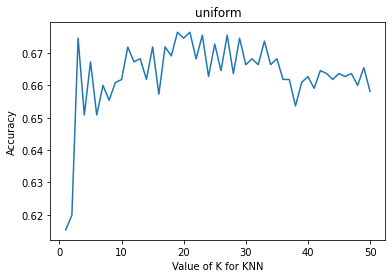

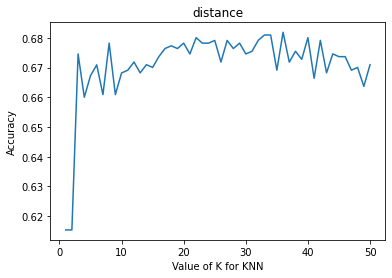

In [2]:
from sklearn.model_selection  import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
#preliminary training to optimize the neighbor number parameter *n_neighbors*
k_range = range(1, 51)
weight_list = ['uniform','distance']

for weight in weight_list:
    k_acc = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
        scores = cross_val_score(knn, x_ts, y_ts, cv=6, scoring='accuracy')
        k_acc.append(scores.mean())

    plt.figure()
    plt.plot(k_range, k_acc)
    plt.title(weight)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Accuracy')
    plt.show()

In [3]:
from sklearn.pipeline import Pipeline
nca = NeighborhoodComponentsAnalysis(random_state=1)
knn = KNeighborsClassifier(n_neighbors=2)

nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(x_tr, y_tr)
acc_ts = nca_pipe.score(x_ts, y_ts)
acc_tr = nca_pipe.score(x_tr, y_tr)
print('acc{train:',acc_tr,';test:',acc_ts,'}')

acc{train: 0.782 ;test: 0.6308113035551504 }
